### Advan Research Exploration for Walmarts

In [12]:
import sys
from pathlib import Path
import pyarrow.parquet as pq
import pyarrow.dataset as ds
import re
import pandas as pd

sys.path.append(str(Path.cwd().parent))
from config import PATH_KIOSK_USER_PATTERNS_FOLDER, PATH_KIOSK_USER_PATTERNS_REPO


kupdat03 = ds.dataset(PATH_KIOSK_USER_PATTERNS_FOLDER / "working/processed/kupdat03_advan research monthly patterns", 
    format="parquet", partitioning=["YEAR", "MONTH"])


In [13]:
kupdat03.head(10).to_pandas()

,CITY,DATE_RANGE_END,DATE_RANGE_START,LATITUDE,LOCATION_NAME,LONGITUDE,NAICS_CODE,PLACEKEY,RAW_VISITOR_COUNTS,RAW_VISIT_COUNTS,REGION,STREET_ADDRESS,FILE_NAME,HOME_CBG,VISITOR_COUNT,YEAR,MONTH
0,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150003001,110,YEAR=2019,MONTH=1
1,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150009002,73,YEAR=2019,MONTH=1
2,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150021002,60,YEAR=2019,MONTH=1
3,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005021,56,YEAR=2019,MONTH=1
4,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005022,55,YEAR=2019,MONTH=1
5,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005023,55,YEAR=2019,MONTH=1
6,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150009004,52,YEAR=2019,MONTH=1
7,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150017005,45,YEAR=2019,MONTH=1
8,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150020021,43,YEAR=2019,MONTH=1
9,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150004005,42,YEAR=2019,MONTH=1


## Unique LOCATION_NAME and counts in kupdat03


In [14]:
# Get unique LOCATION_NAME values and counts of those values without loading the entire dataset
# Use PyArrow to compute counts efficiently
location_counts = kupdat03.scanner(columns=["LOCATION_NAME"]).to_table().group_by("LOCATION_NAME").aggregate([("LOCATION_NAME", "count")]).to_pandas()
location_counts.columns = ["LOCATION_NAME", "COUNT"]
location_counts = location_counts.sort_values("COUNT", ascending=False)

# Display the top results
print(f"Total unique locations: {len(location_counts)}")


location_counts.to_csv(PATH_KIOSK_USER_PATTERNS_REPO/"analysis/kupana03_walmart location names and counts.csv", index=False)

Total unique locations: 2936


In [15]:
location_counts.head(20)



,LOCATION_NAME,COUNT
0,Walmart Pharmacy,34717022
1,Walmart Vision Center,31062566
8,Walmart Photo Center,30712579
10,Walmart Auto Care Center,24814232
4,Walmart Supercenter,18373377
2,Walmart Fuel Station,2280110
6,Walmart Neighborhood Market,1824480
5,Walmart,1596187
7,Walmart Distribution,830694
211,Sunbelt Rentals Inside Walmart,300644


In [16]:

# Select the locations to keep:
selected_locations = ["Walmart Pharmacy","Walmart Supercenter","Walmart","Walmart Center","Walmart Neighborhood Market"]
# Create a regex pattern to match both "Walmart" and "Supercenter" in any order
pattern = re.compile(r'(?=.*Walmart)(?=.*Supercenter)', re.IGNORECASE)

# Filter locations that are in our selected list or match the pattern
def filter_location(loc):
    if loc in selected_locations:
        return True
    # Check if it matches "Walmart" and "Supercenter" in any order
    elif pattern.search(loc):
        return True
    return False

# Get all unique location names from our location_counts dataframe
all_locations = location_counts['LOCATION_NAME'].tolist()

# Apply our filter to get the list of locations to keep
locations_to_keep = [loc for loc in all_locations if filter_location(loc)]

# Print the number of locations that will be kept
print(f"Keeping {len(locations_to_keep)} out of {len(all_locations)} locations")

# Display the first few locations we're keeping
print("Sample locations being kept:")
for loc in locations_to_keep[:10]:
    print(f"  - {loc}")

# Create a filtered dataset with only the selected locations
filtered_kupdat03 = kupdat03.filter(ds.field('LOCATION_NAME').isin(locations_to_keep))

Keeping 2343 out of 2936 locations
Sample locations being kept:
  - Walmart Pharmacy
  - Walmart Supercenter
  - Walmart Neighborhood Market
  - Walmart
  - Walmart Center
  - Walmart Supercenter San Antonio Supercenter
  - Walmart Supercenter Houston Supercenter
  - Walmart Supercenter Jacksonville Supercenter
  - Walmart Supercenter Dallas Supercenter
  - Walmart Supercenter Las Vegas Supercenter


In [7]:
# Count total rows in filtered_kupdat03
row_count = filtered_kupdat03.scanner().count_rows()
print(f"Total rows in filtered_kupdat03: {row_count:,}")

# Get a sample of the data to verify contents
sample_df = filtered_kupdat03.head(5).to_pandas()
print("\nSample data:")
display(sample_df)



Total rows in filtered_kupdat03: 69,277,648

Sample data:


,CITY,DATE_RANGE_END,DATE_RANGE_START,LATITUDE,LOCATION_NAME,LONGITUDE,NAICS_CODE,PLACEKEY,RAW_VISITOR_COUNTS,RAW_VISIT_COUNTS,REGION,STREET_ADDRESS,FILE_NAME,HOME_CBG,VISITOR_COUNT,YEAR,MONTH
0,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150003001,110,YEAR=2019,MONTH=1
1,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150009002,73,YEAR=2019,MONTH=1
2,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150021002,60,YEAR=2019,MONTH=1
3,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005021,56,YEAR=2019,MONTH=1
4,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005022,55,YEAR=2019,MONTH=1


In [8]:
# Count rows by location type to see distribution
location_distribution = filtered_kupdat03.scanner(columns=["LOCATION_NAME"]).to_table().group_by("LOCATION_NAME").aggregate([("LOCATION_NAME", "count")]).to_pandas()
location_distribution.columns = ["LOCATION_NAME", "COUNT"]
location_distribution = location_distribution.sort_values("COUNT", ascending=False)
display(location_distribution.head(10))

,LOCATION_NAME,COUNT
0,Walmart Pharmacy,34717022
1,Walmart Supercenter,18373377
3,Walmart Neighborhood Market,1824480
2,Walmart,1596187
6,Walmart Center,150905
35,Walmart Supercenter San Antonio Supercenter,125979
104,Walmart Supercenter Houston Supercenter,117977
19,Walmart Supercenter Jacksonville Supercenter,83993
341,Walmart Supercenter Dallas Supercenter,71571
173,Walmart Supercenter Las Vegas Supercenter,54287


In [28]:
# Convert to pandas with necessary columns
filtered_df = filtered_kupdat03.to_table(
    columns=["HOME_CBG", "VISITOR_COUNT", "STREET_ADDRESS", "LATITUDE", "LONGITUDE", "REGION", "YEAR", "MONTH"]
).to_pandas()

# Extract YEAR/MONTH as int
filtered_df["YEAR"] = filtered_df["YEAR"].astype(str).str.extract(r'(\d{4})').astype(int)
filtered_df["MONTH"] = filtered_df["MONTH"].astype(str).str.extract(r'(\d{1,2})').astype(int)

# Filter for Jan 2024, GA
filtered_df = filtered_df[
    (filtered_df["YEAR"] == 2024) &
    (filtered_df["MONTH"] == 1) &
    (filtered_df["REGION"] == "GA")
].copy()

# Ensure numeric
filtered_df["VISITOR_COUNT"] = pd.to_numeric(filtered_df["VISITOR_COUNT"], errors="coerce")

# Aggregate
step1_result = (
    filtered_df.groupby(
        ["HOME_CBG", "STREET_ADDRESS", "LATITUDE", "LONGITUDE"], as_index=False
    )
    .agg({"VISITOR_COUNT": "sum"})
)

print("Step 1 complete. Example rows:")
print(step1_result.head())

Step 1 complete. Example rows:
       HOME_CBG         STREET_ADDRESS   LATITUDE  LONGITUDE  VISITOR_COUNT
0  010010208023         8424 Mall Pkwy  33.694748 -84.084961            5.0
1  010010208024         815 Shugart Rd  34.786706 -84.999151            7.0
2  010010208024         815 Shugart Rd  34.787157 -84.998561            7.0
3  010030103002  101 Market Place Blvd  34.203019 -84.787649            6.0
4  010030103002  101 Market Place Blvd  34.203030 -84.787661            6.0


In [29]:
import pyarrow.dataset as ds
import pandas as pd

# Load the "home panel summary" Parquet dataset (update path as needed)
kupdat03_hps = ds.dataset(
    PATH_KIOSK_USER_PATTERNS_FOLDER / "working/processed/kupdat03_advan research home panel summary",
    format="parquet",
    partitioning=["YEAR", "MONTH"]
)

# Read only the needed columns for memory efficiency
home_panel_df = kupdat03_hps.to_table(
    columns=["CENSUS_BLOCK_GROUP", "NUMBER_DEVICES_RESIDING", "REGION", "YEAR", "MONTH"]
).to_pandas()

# Fix YEAR and MONTH columns if necessary (sometimes they're strings like "YEAR=2024")
if home_panel_df["YEAR"].dtype == object and home_panel_df["YEAR"].str.contains("YEAR=").any():
    home_panel_df["YEAR"] = home_panel_df["YEAR"].str.extract(r'(\d+)').astype(int)
if home_panel_df["MONTH"].dtype == object and home_panel_df["MONTH"].str.contains("MONTH=").any():
    home_panel_df["MONTH"] = home_panel_df["MONTH"].str.extract(r'(\d+)').astype(int)

# Filter for January 2024, Georgia
filtered_home_panel = home_panel_df[
    (home_panel_df["YEAR"] == 2024) &
    (home_panel_df["MONTH"] == 1) &
    (home_panel_df["REGION"] == "GA")
].copy()

# Make sure device count column is numeric
filtered_home_panel["NUMBER_DEVICES_RESIDING"] = pd.to_numeric(filtered_home_panel["NUMBER_DEVICES_RESIDING"], errors="coerce")

# Aggregate to one row per CBG (CENSUS_BLOCK_GROUP)
step2_result = (
    filtered_home_panel
    .groupby("CENSUS_BLOCK_GROUP", as_index=False)
    .agg({"NUMBER_DEVICES_RESIDING": "sum"})
)

print("Step 2 complete. Example rows:")
print(step2_result.head())
print("Number of unique CBGs:", step2_result['CENSUS_BLOCK_GROUP'].nunique())
print("Number of rows in output:", len(step2_result))

Step 2 complete. Example rows:
  CENSUS_BLOCK_GROUP  NUMBER_DEVICES_RESIDING
0       130019501001                     48.0
1       130019501002                    134.0
2       130019502001                     85.0
3       130019502002                     87.0
4       130019502003                     58.0
Number of unique CBGs: 5529
Number of rows in output: 5529


Example CBG: 130550101002
Example CBG Walmart visits:
               STREET_ADDRESS  PERCENTAGE_VISITED  VISITOR_COUNT
7991    101 Market Place Blvd            5.405405            6.0
7992    101 Market Place Blvd            5.405405            6.0
7993         13427 Highway 27          781.981982          868.0
7994         13427 Highway 27          781.981982          868.0
7995      2510 Redmond Cir NW          145.045045          161.0
7996      2510 Redmond Cir NW          145.045045          161.0
7997           262 Cordele Rd            9.009009           10.0
7998           262 Cordele Rd            9.009009           10.0
7999        2625 N Highway 27           72.972973           81.0
8000        2625 N Highway 27           72.972973           81.0
8001    3040 Battlefield Pkwy           18.018018           20.0
8002         450 W Belmont Dr            4.504505            5.0
8003         450 W Belmont Dr            4.504505            5.0
8004      803 New Franklin Rd       

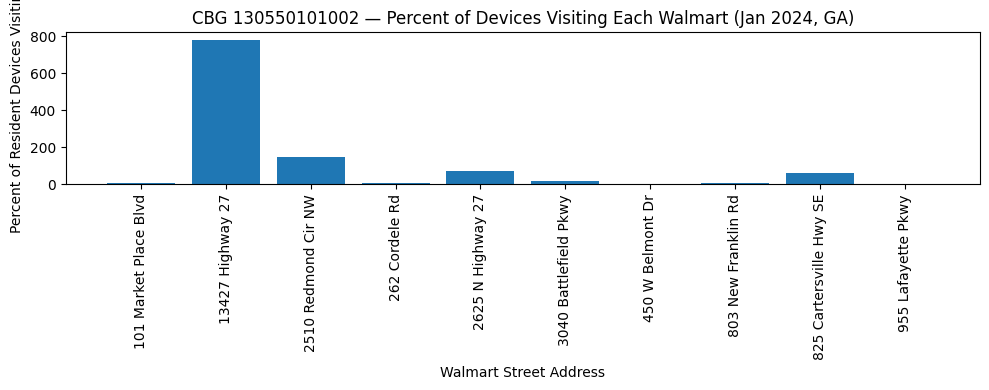

In [30]:
import random
import matplotlib.pyplot as plt

# Step 3.1: Merge Step 1 and Step 2 results
merged = step1_result.merge(
    step2_result,
    left_on='HOME_CBG',
    right_on='CENSUS_BLOCK_GROUP',
    how='inner'
)

# Step 3.2: Pick a random CBG to explore
random_cbg = random.choice(merged['HOME_CBG'].unique())
print("Example CBG:", random_cbg)

# Step 3.3: Subset to this CBG
cbg_visits = merged[merged['HOME_CBG'] == random_cbg].copy()

# Step 3.4: Calculate percent of devices that visited each Walmart
cbg_visits['PERCENTAGE_VISITED'] = (cbg_visits['VISITOR_COUNT'] / cbg_visits['NUMBER_DEVICES_RESIDING']) * 100

print("Example CBG Walmart visits:")
print(cbg_visits[['STREET_ADDRESS', 'PERCENTAGE_VISITED', 'VISITOR_COUNT']])

# Step 3.5: Plot as a barplot (a "heatmap" for this CBG)
plt.figure(figsize=(10, 4))
plt.bar(cbg_visits['STREET_ADDRESS'], cbg_visits['PERCENTAGE_VISITED'])
plt.xlabel("Walmart Street Address")
plt.ylabel("Percent of Resident Devices Visiting")
plt.title(f"CBG {random_cbg} — Percent of Devices Visiting Each Walmart (Jan 2024, GA)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

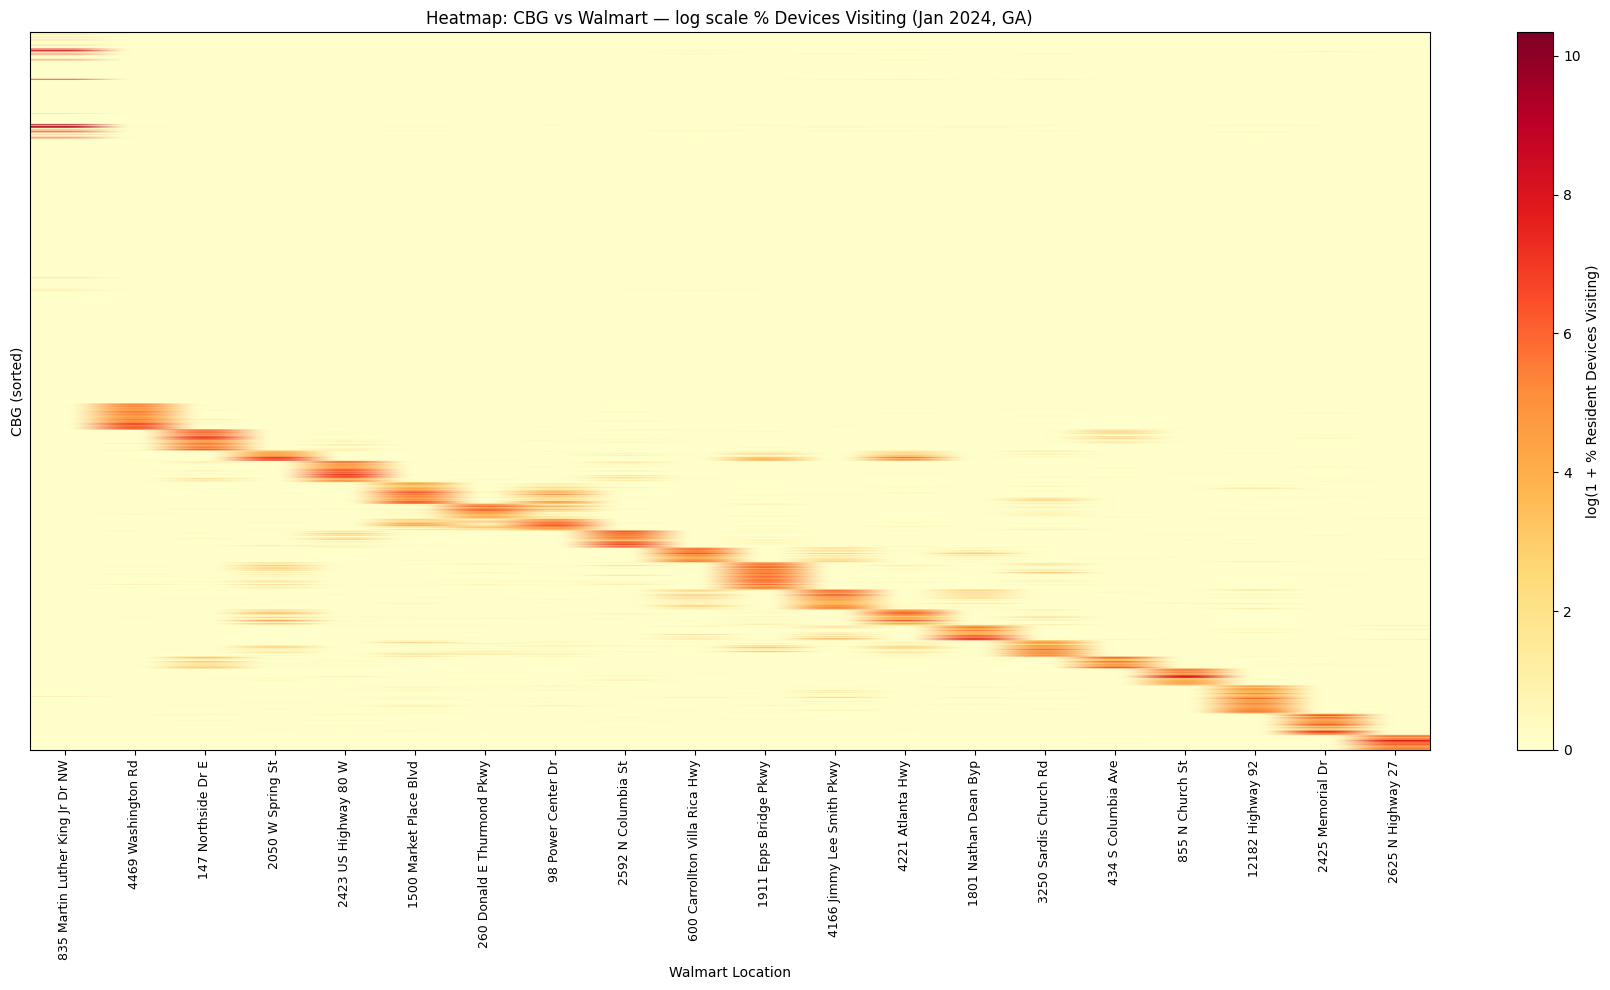

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sort rows (CBGs) by the Walmart with the highest % visiting
pivot['max_col'] = pivot.values.argmax(axis=1)
pivot_sorted = pivot.sort_values('max_col').drop(columns='max_col')

# 2. Plot log(1 + %) heatmap for better contrast
plt.figure(figsize=(18, 10))
plt.imshow(np.log1p(pivot_sorted), aspect='auto', cmap='YlOrRd')
plt.colorbar(label="log(1 + % Resident Devices Visiting)")
plt.xlabel("Walmart Location")
plt.ylabel("CBG (sorted)")
plt.title("Heatmap: CBG vs Walmart — log scale % Devices Visiting (Jan 2024, GA)")
plt.xticks(
    ticks=np.arange(len(pivot_sorted.columns)),
    labels=pivot_sorted.columns,
    rotation=90,
    fontsize=9
)
plt.yticks([], [])  # Hide CBG labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# Count total number of unique Walmart locations in the heatmap
n_walmarts_heatmap = pivot.shape[1]
print("Number of Walmart locations represented in the heatmap:", n_walmarts_heatmap)

Number of Walmart locations represented in the heatmap: 21


In [ ]:
# Count total number of unique Walmarts in GA for Jan 2024
total_walmarts_GA = filtered_df['STREET_ADDRESS'].nunique()
print("Total number of unique Walmarts in GA (in Pursuant data, for Jan 2024):", total_walmarts_GA)

Total number of unique Walmarts in GA (in Pursuant data, for Jan 2024): 186


In [38]:
n_walmarts_heatmap = pivot.shape[1]  # Number of columns = Walmarts in heatmap
print("Proportion represented in heatmap:", f"{n_walmarts_heatmap}/{total_walmarts_GA}", "=", n_walmarts_heatmap/total_walmarts_GA)

Proportion represented in heatmap: 21/186 = 0.11290322580645161
